> ## <span style="font-family:Courier">Remark</span>
> 
> <font color=""><span style="font-family:Courier">Please use **ChatGPT** and **Copilot** responsibly. You will be asked a few questions before the marks are awarded.</span></font>

# Fixed-Point method
***
## <span style="font-family:monospace;">Concept</span>

A fixed-point method is a numerical technique used to find a solution to the equation
$$x = g(x)$$

In other words, we are looking for a **fixed point** of the function $g(x)$, which is a value $x^{\ast}$ such that
$$g(x^{\ast}) = x^{\ast}$$
Graphically, a fixed is the $x$-coordinate where the graph $y = g(x)$ intersects the straight line $y = x$. The core idea is to take a given equation $f(x) = 0$ whose root we want to find and **algebraically rearrange it** into the fixed-point for $x = g(x)$. That is, if $x^{\ast}$ is the root of the original equation $f(x) = 0$ (i.e., $f(x^{\ast}) = 0$), then $x^{\ast} = g(x^{\ast})$

## <span style="font-family:monospace;">The Iterative Formula</span>

We start with an initial guess $x_0$, and generate a sequence of approximations $\{ x_ n\}$ using the iterative formula:
$$x_{n + 1} = g(x_n)$$

## <span style="font-family:monospace;">Convergence</span>
- If the sequence $\{x_n\}$ converges to a value $x^{\ast}$, then $x^{\ast}$ is the fixed point, and thus the root of the original equation $f(x)=0$.
- **Convergence Condition**: The iteration is guaranteed to coverge to fixed point $x^{\ast}$ if in the neighborhood of $x^{\ast}$, the absolute value of the derivative of $g(x)$ is less than $1$: $|g^{\prime}(x)| < 1$.

## <span style="font-family:monospace;">Example: Approximating</span> $\sqrt{2}$

To compute $\sqrt{2}$, we can seek the root of the equation $x^2 - 2 = 0$. Apparently, it is meaningless if we try to compute $\sqrt{2}$ by saying "we need to compute $x= \sqrt{2}$" because $\sqrt{(\diamond)}$ is not computable in the first place. Instead, we can rewrite this equation as follows

$$
\begin{aligned}
\quad & x^2 - 2 = 0 \\
\Leftrightarrow\quad & \frac{1}{2}x^2 - 1 = 0 \\
\Leftrightarrow\quad & x^2 - \Big(\frac{1}{2}x^2 + 1 \Big) = 0 \\
\Leftrightarrow\quad & x^2 = \frac{1}{2}(x^2 + 2) \\
\Leftrightarrow\quad & x = \frac{1}{2}\Big(x + \frac{2}{x} \Big)
\end{aligned}
$$
So, the square root of $2$ can be computed as the fixed point of the function $\displaystyle g(x) = \frac{1}{2}\Big(x + \frac{2}{x} \Big)$.

/tmp/ipykernel_2360/4223385649.py:6: RuntimeWarning: divide by zero encountered in divide
  gfunc = 0.5 * (x + 2/x)


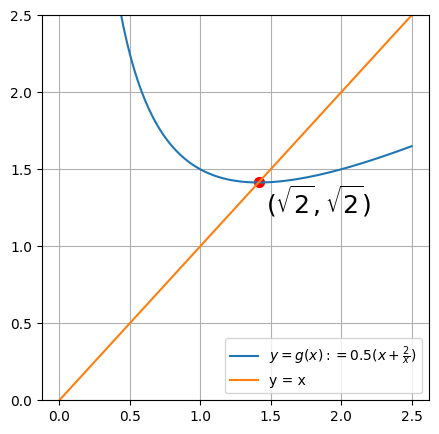

In [29]:
# This is the graph to illustrate fixed point of g(x) -- you can ignore the code
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2.5, 100)
gfunc = 0.5 * (x + 2/x)
plt.figure(figsize=(5, 5))
plt.plot(x, gfunc, x, x)
plt.ylim([0, 2.5])
plt.grid(True)
plt.scatter(np.sqrt(2), np.sqrt(2), marker='o', s=50, color="red")
plt.text(np.sqrt(2) + 0.05, np.sqrt(2) - 0.2, "$(\\sqrt{2}, \\sqrt{2})$", fontsize=18)
plt.legend(["$y = g(x) := 0.5(x + \\frac{2}{x})$", "y = x"])
plt.show()

# <font color="red">Task</font>

Your task is to write a Python function to implement the fixed-point method. 

1. This Python function must receive
    - a Python function that represents the function $g(x)$ described in the above theory, 
    - a maximum number of iterations allowed in the algorithm,
    - a tolerance to stop the iteration process.

2. The function returns the value of the fixed point $x^{\ast}$ and a number of needed iterations for that value if the convergence reaches. In case of divergence (not convergence), i.e., the fixed point cannot be found in the defined number of iterations and tolerance, the function must return nothing and warn of "divergence".

3. Your function receives default values for the number of iterations and the tolerance value.

4. Apply your function to compute $\sqrt{5}$ and compare it with `math.sqrt{5}` from Python.

In [30]:
import math
# You need to compare your result with this value
print(math.sqrt(5))

2.23606797749979


# Newton-Raphson method
***
## <span style="font-family:monospace;">Concept and Formula</span>

The Newton-Raphson method is a powerful and widely used numerical technique for finding **roots of equations** -- that is, solving equations of the form
$$f(x) = 0$$

The method uses the idea of **linear approximation**. Starting from an initial guess $x_0$, it iteratively improves the guess using the formula:

$$x_{n + 1} = x_{n} - \frac{f(x_n)}{f^{\prime}(x_n)}$$

Here:
- $f(x)$ is the function whose root we are trying to find.
- $f^{\prime}(x)$ is the first derivative of $f(x)$
- $x_n$ is the *current* approximation
- $x_{n+1}$ is the *next* and improved approximation of the root.
- We repeat the iteration until the change between two successive guesses is very small (i.e., convergence) or until $f(x)$ is close to $0$.
<!-- ![Newton Raphson](./newton-raphson.png) -->
<img src="./newton-raphson.png" alt="Newton Raphson method" width="60%">



## <span style="font-family:monospace;">Mathematical aspects and derivation</span>
You can skip the following explanation and derivation and focus on the final formula: Given the solution $x_n$ at the step $n$, we compute the solution $x_{n+1}$ at the next step $n + 1$ according to
$$
x_{n + 1} = x_{n} - \frac{f(x_n)}{f^{\prime}(x_n)}
$$
But in case you are interested in the math, go on. Even though two derivations look different, they are based on the same idea.

### <u><span style="font-family:monospace;">*Using Taylor expansion*</span></u>

Assume that at the iteration step $n$ the solution is $x_n$. In the first approach, we use a Taylor expansion for the function $f = f(x)$ about the value $x_n$ as follows  
$$
f(x) = f(x_n) + f^{\prime}(x_n)(x - x_n) + \mathcal{O}((x - x_n)^2)
$$  
This formulation means that $f(x)$ can be approximated by the expression 
$$
G(x) := f(x_n) + f^{\prime}(x_n)(x - x_n)
$$ 
with the error is smaller than $e(x) = C(x - x_n)^2$ and $C$ is some pre-defined constant. Clearly, when $x$ tends to $x_n$ the error $e(x)$ tends to zero, namely $\lim\limits_{x \rightarrow x_n} e(x) = 0$. Henceforth, we can "loosely" say $f(x) \approx G(x)$ when $x \approx x_n$ - well, this is not a surprise. Therefore, it makes sense to look for the next-step solution $x_{n + 1}$ as the root of $G(x)$ with the hope that 
$$f(x_{n + 1}) \approx G(x_{n + 1}) = 0$$
With this in mind, we solve $G(x) = 0$ for the solution $\widehat{x}$ and then set $x_{n + 1} := \widehat{x}$ as follows:
$$
G(x) = f(x_n) + f^{\prime}(x_n)(x - x_n) = 0 \quad\Rightarrow\quad x - x_n =  -\frac{f(x_n)}{f^{\prime}(x_n)} \quad\Rightarrow\quad x_{n + 1} := \widehat{x} = x_n - \frac{f(x_n)}{f^{\prime}(x_n)}
$$ 

### <u><span style="font-family:monospace;">*Using tangents*</span></u>
Assume that at the iteration step $n$ the solution is $x_n$. In the second approach, we just use illustrative intuitive (see the included figure above). Specfically, we compute $x_{n+1}$ as the intersection between the tangent of the graph $y = f(x)$ at $x_{n}$, denoted by $(T_{n})$ (the tangent changes at every iteration step $n$), and the horizontal line $y = 0$, denoted by $(H)$. As we can see from the above figure, if we repeat the process using the intersection of the tangent lines $(T_{n})$ and the horizontal line to obtain the next-step solution, the sequence $\{x_n\}$ "hopefully" converges to the solution of $f(x) = 0$.
The tangent line $(T)$ and the horizontal line $(H)$ are described by the equations
$$
\begin{aligned}
(T_{n}) &: y = f^{\prime}(x_n) (x - x_n) + f(x_n) \\[6pt]
(H) &: y = 0
\end{aligned}
$$

The intersection between $(T_{n})$ and $(H)$ is then determined according to
$$
f^{\prime}(x_n) (x - x_n) + f(x_n) = 0
$$
The solution of this equation $\widehat{x}$ is set to $x_{n+1}$ for the next iteration step. So we have
$$
x_{n + 1} := \widehat{x} = x_n - \frac{f(x_n)}{f^{\prime}(x_n)}

# <font color="red">Task</font>

Your task is to write a Python function to implement the Newton-Raphson method.

1. This Python function must receive
    - a Python function that represent the function $f(x)$ described in the above theory, 
    - a Python function that represents the derivative $f^{\prime}(x)$ described in the above theory,
    - a maximum number of iterations allowed in the algorithm,
    - a tolerance to stop the iteration process.

2. The function returns the solution of the equation $f(x) = 0$ and the number of needed iterations for that value if the convergence reaches. In case of divergence, the function must return nothing and warn of "divergence".

3. Your function receives default values for the number of iterations and the tolerance value.

4. You must decide how to stop the algorithm appropriately.

5. Apply your written function to find all the root of the equation in the range $[0, 10]$.
$$
f(x) = \exp\bigg(-\frac{1}{10}x \bigg) \sin(2 x)
$$

> **Remark** 
>
> You are supposed **NOT** to use **Numpy** library for this task. You want to use `math` instead.


In [31]:
# Examples using math
import math
print(math.exp(1))
print(math.sin(2 * math.pi * 0.75))

2.718281828459045
-1.0


## Some help in advance

The following code cells give you some help. But it also takes a chance to introduce you to a useful libraries 
- **SymPy** -- [Click on this link](https://www.sympy.org/en/index.html) -- use this [Tutorial](https://docs.sympy.org/latest/tutorials/intro-tutorial/index.html#intro-tutorial) to learn
- **NumPy** -- [Click on this link](https://numpy.org/) -- use this [User Guide](https://numpy.org/doc/stable/user/absolute_beginners.html) to learn

> Again, you are supposed **not** to use NumPy library in this task. The plotting is just for visualization.

In [32]:
import sympy as sp
from sympy import symbols
import numpy as np
import matplotlib.pyplot as plt

In [33]:
x, pi = symbols('x pi')
func = sp.exp(-1/10 * x) * sp.sin(2 * x)
dfunc = sp.diff(func, x)
print(func)
print(dfunc)

exp(-0.1*x)*sin(2*x)
-0.1*exp(-0.1*x)*sin(2*x) + 2*exp(-0.1*x)*cos(2*x)


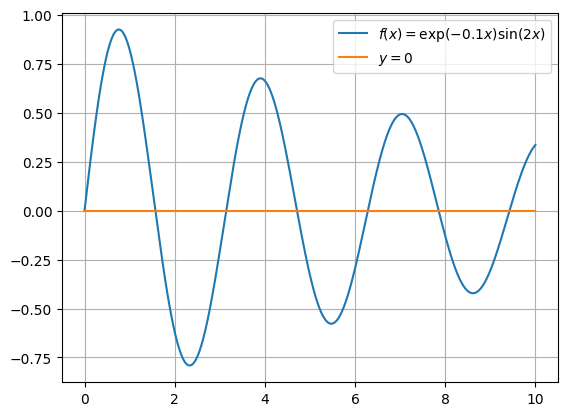

In [34]:
x = np.linspace(0, 10, 1000)            # 1000 points linearly spaced in the range [0, 10]
f = np.exp(-0.1 * x) * np.sin(2 * x)
plt.plot(x, f, x, np.zeros_like(x))     
plt.grid(True)      # show the grid so that you can estimate the roots of the equation
plt.legend(["$f(x) = \\exp(-0.1 x)\\sin(2 x)$", "$y = 0$"])
plt.show()